**Import Library**

In [49]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Download and prepare the CIFAR-10 dataset**

In [50]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [52]:
train_images, test_images = train_images / 255.0, test_images / 255.0

**Feature Extraction - Convolutional Base**

In [54]:
train_images[100].shape

(32, 32, 3)

In [108]:
model = models.Sequential()
model.add(layers.Conv2D( 64, (3,3), activation='relu', input_shape=(32,32,3) ) )
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Conv2D( 64, (3,3), activation='relu' ) )
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Conv2D( 64, (3,3), activation='relu' ) )
model.add(layers.Dropout(0.5))

In [109]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 dropout_4 (Dropout)         (None, 4, 4, 64)        

**Flatten & Fully Connected Layer**

In [110]:
model.add(layers.Flatten())
model.add(layers.Dense(100, activation= 'relu'))
model.add(layers.Dense(100))

In [111]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 dropout_4 (Dropout)         (None, 4, 4, 64)        

**Compile and train the model**

In [112]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [113]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=1, validation_data=(test_images, test_labels))

Epoch 1/5
50000/50000 [==============================] - 115s 2ms/step - loss: 1.7222 - accuracy: 0.3635 - val_loss: 1.5614 - val_accuracy: 0.4167
Epoch 2/5
50000/50000 [==============================] - 112s 2ms/step - loss: 1.5428 - accuracy: 0.4441 - val_loss: 1.4246 - val_accuracy: 0.4955
Epoch 3/5
50000/50000 [==============================] - 119s 2ms/step - loss: 1.5006 - accuracy: 0.4645 - val_loss: 1.4487 - val_accuracy: 0.4766
Epoch 4/5
50000/50000 [==============================] - 116s 2ms/step - loss: 1.4900 - accuracy: 0.4711 - val_loss: 1.4400 - val_accuracy: 0.4825
Epoch 5/5
50000/50000 [==============================] - 113s 2ms/step - loss: 1.4866 - accuracy: 0.4715 - val_loss: 1.3861 - val_accuracy: 0.5053


**Evaluate the model**

In [114]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 1.3861 - accuracy: 0.5053


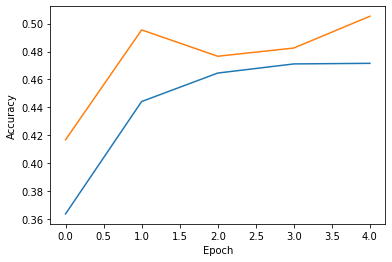

In [115]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()




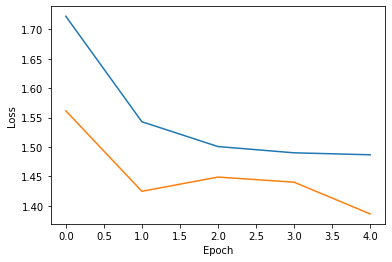

In [116]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


